In [2]:
import pandas as pd
import pairs_strategy_functions as ps
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import os

%load_ext autoreload
%autoreload 2

In [ ]:
prices = pd.read_csv(r"Data\prices_long.csv", index_col="Date", parse_dates=True)
rets = prices.pct_change().dropna()
results_pairs1 = pairs_strategy(r=rets)

I saved the results gotten from the above code in a CSV file. Below I am calling the CSV file.

In [4]:
# calling the csv file saved above
keys = pd.read_csv(r"C:data\keys_modified.csv")["keys"]
# creating a dictionary with the results
name_docs = np.arange(10)
results_dict = {}

for key in keys:
    dict_of_dict = {}
    for name in name_docs:
        dict_of_dict[name] =  pd.read_csv(r"C:data"+f"\\{key}\\{name}.csv",
                                         index_col="Date", parse_dates=True)
    results_dict[key] = dict_of_dict

In [10]:
key = "testing period 1995-01-11  to 1996-01-09 , trading period 1996-01-10  to 1996-07-08"
ticker0 = results_dict[key][0][["pair0","pair1"]].iloc[0][0]
ticker1 = results_dict[key][0][["pair0","pair1"]].iloc[0][1]
name = f"{ticker0} - {ticker1}"
wealth = pd.DataFrame((results_dict[key][0][["pair0_ret","pair1_ret"]].dropna()+1).cumprod().sum(axis=1), columns=[name])
wealth_ret = wealth.pct_change().dropna()
results_0 = ps.summary_stats(wealth_ret, 252)
start = wealth_ret.index[0]
end = wealth_ret.index[-1]
start_str = str(start).replace(":", "").replace("000000", "").rstrip()
end_str = str(end).replace(":", "").replace("000000", "").rstrip()
results_0["trading_period"] = f"{start_str} - {end_str}"
results_0["days trading"] = str(end-start).replace("00:00:00", "").rstrip()

for key in list(results_dict.keys())[1:]:
    ticker0 = results_dict[key][0][["pair0","pair1"]].iloc[0][0]
    ticker1 = results_dict[key][0][["pair0","pair1"]].iloc[0][1]
    name = f"{ticker0} - {ticker1}"
    wealth = pd.DataFrame((results_dict[key][0][["pair0_ret","pair1_ret"]].dropna()+1).cumprod().sum(axis=1), columns=[name])
    wealth_ret = wealth.pct_change().dropna()
    results = ps.summary_stats(wealth_ret, 252)
    start = wealth_ret.index[0]
    end = wealth_ret.index[-1]
    start_str = str(start).replace(":", "").replace("000000", "").rstrip()
    end_str = str(end).replace(":", "").replace("000000", "").rstrip()
    results["trading_period"] = f"{start_str} - {end_str}"
    results["days trading"] = str(end-start).replace("00:00:00", "").rstrip()
    results_0 = pd.concat([results_0, results])

C:\Users\jsaco\3D Objects\Practice\github\Pairs trading\toolkit.py:162: RuntimeWarning: divide by zero encountered in double_scalars
  return ann_ex_ret/ann_vol
C:\Users\jsaco\3D Objects\Practice\github\Pairs trading\toolkit.py:162: RuntimeWarning: divide by zero encountered in double_scalars
  return ann_ex_ret/ann_vol


In [11]:
results_0

,Annualized Return,Annualized Vol,Historic CVaR (5%),Sharpe Ratio,Max Drawdown,trading_period,days trading
MQT - MQY,0.112590,0.061645,0.006463,1.300903,-0.015956,1996-01-12 - 1996-07-08,178 days
VCV - MNP,0.125829,0.080313,0.009958,1.158577,-0.026752,1996-07-11 - 1997-02-28,232 days
SPE - VKI,0.037367,0.026951,0.000178,0.265410,-0.010370,1997-01-08 - 1997-07-02,175 days
JHS - NXP,0.035162,0.095748,0.013665,0.052339,-0.222317,1997-07-08 - 2022-04-26,9058 days
MYD - MYN,0.188682,0.062697,0.006480,2.457530,-0.017236,1998-01-05 - 1998-09-02,240 days
MVT - MQY,0.140932,0.065526,0.007539,1.643827,-0.020282,1998-07-06 - 1999-01-08,186 days
MQY - VGM,0.025943,0.076139,0.011150,-0.051748,-0.182299,1998-12-31 - 2022-04-26,8517 days
IQI - SPE,0.210453,0.060367,0.007277,2.902584,-0.019922,1999-07-01 - 1999-12-27,179 days
MYD - MYI,0.064142,0.082734,0.009977,0.400693,-0.028462,1999-12-29 - 2000-07-05,189 days
MYI - MQY,0.084330,0.041577,0.005999,1.268809,-0.014205,2000-06-27 - 2001-01-05,192 days


In [13]:
n_days = []
for days in results_0["days trading"]:
    day= int(days.replace(" days", ""))
    n_days.append(day)
results_0["days(int)"] = pd.Series(n_days, index=results_0.index)

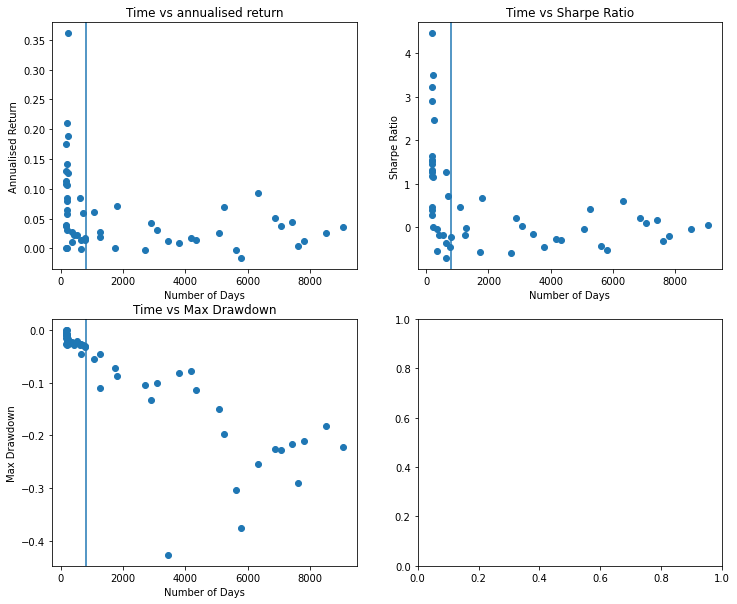

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
ax[0,0].scatter(results_0["days(int)"], results_0["Annualized Return"])
ax[0,0].set_title("Time vs annualised return")
ax[0,0].set(xlabel = "Number of Days", ylabel = "Annualised Return")
ax[0,0].axvline(800)
ax[0,1].scatter(results_0["days(int)"], results_0["Sharpe Ratio"])
ax[0,1].set_title("Time vs Sharpe Ratio")
ax[0,1].set(xlabel = "Number of Days", ylabel = "Sharpe Ratio")
ax[0,1].axvline(800)
ax[1,0].scatter(results_0["days(int)"], results_0["Max Drawdown"])
ax[1,0].set_title("Time vs Max Drawdown")
ax[1,0].set(xlabel = "Number of Days", ylabel = "Max Drawdown")
ax[1,0].axvline(800)

**Note on the plots:** The plots above, are really interesting. Technically we can see that when the trading period is over 800 days, the annualised return and sharpe ratio decrease. On the other hand, the potential max drawdown increases dramatically. One could close the positions when a pair has been trading for longer than 800 days to avoid the possibility of any larger drawdown.

In [16]:
# Now we are going to add the "stop loss" based on the days set at max 800.
mark = 550 # due to weekends and non trading days, 550 trading days equal aprox 800 calendar days.
key = "testing period 1995-01-11  to 1996-01-09 , trading period 1996-01-10  to 1996-07-08"
ticker0 = results_dict[key][0][["pair0","pair1"]].iloc[0][0]
ticker1 = results_dict[key][0][["pair0","pair1"]].iloc[0][1]
name = f"{ticker0} - {ticker1}"
wealth = pd.DataFrame((results_dict[key][0][["pair0_ret","pair1_ret"]].dropna()+1).cumprod().sum(axis=1), columns=[name])
wealth_ret = wealth.pct_change().dropna()
wealth_ret = wealth_ret.iloc[0:mark]
results_0 = ps.summary_stats(wealth_ret, 252)
start = wealth_ret.index[0]
end = wealth_ret.index[-1]
start_str = str(start).replace(":", "").replace("000000", "").rstrip()
end_str = str(end).replace(":", "").replace("000000", "").rstrip()
results_0["trading_period"] = f"{start_str} - {end_str}"
results_0["days trading"] = str(end-start).replace("00:00:00", "").rstrip()

for key in list(results_dict.keys())[20:]:
    ticker0 = results_dict[key][0][["pair0","pair1"]].iloc[0][0]
    ticker1 = results_dict[key][0][["pair0","pair1"]].iloc[0][1]
    name = f"{ticker0} - {ticker1}"
    wealth = pd.DataFrame((results_dict[key][0][["pair0_ret","pair1_ret"]].dropna()+1).cumprod().sum(axis=1), columns=[name])
    wealth_ret = wealth.pct_change().dropna()
    wealth_ret = wealth_ret.iloc[0:mark]
    results = ps.summary_stats(wealth_ret, 252)
    start = wealth_ret.index[0]
    end = wealth_ret.index[-1]
    start_str = str(start).replace(":", "").replace("000000", "").rstrip()
    end_str = str(end).replace(":", "").replace("000000", "").rstrip()
    results["trading_period"] = f"{start_str} - {end_str}"
    results["days trading"] = str(end-start).replace("00:00:00", "").rstrip()
    results_0 = pd.concat([results_0, results])

C:\Users\jsaco\3D Objects\Practice\github\Pairs trading\toolkit.py:162: RuntimeWarning: divide by zero encountered in double_scalars
  return ann_ex_ret/ann_vol
C:\Users\jsaco\3D Objects\Practice\github\Pairs trading\toolkit.py:162: RuntimeWarning: divide by zero encountered in double_scalars
  return ann_ex_ret/ann_vol


In [17]:
(results_0["Annualized Return"] > 0).sum() / results_0.shape[0], results_0["Annualized Return"].mean(), results_0["Annualized Return"].median()

(0.8235294117647058, 0.06331241078779591, 0.057880650539938294)

**82% of the trades were succesful under this constraint.**

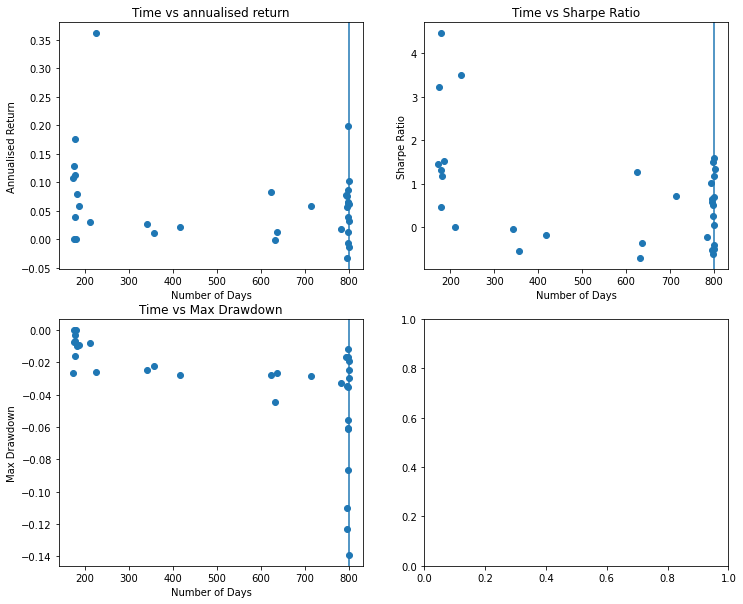

In [19]:
n_days = []
for days in results_0["days trading"]:
    day= int(days.replace(" days", ""))
    n_days.append(day)
results_0["days(int)"] = pd.Series(n_days, index=results_0.index)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
ax[0,0].scatter(results_0["days(int)"], results_0["Annualized Return"])
ax[0,0].set_title("Time vs annualised return")
ax[0,0].set(xlabel = "Number of Days", ylabel = "Annualised Return")
ax[0,0].axvline(800)
ax[0,1].scatter(results_0["days(int)"], results_0["Sharpe Ratio"])
ax[0,1].set_title("Time vs Sharpe Ratio")
ax[0,1].set(xlabel = "Number of Days", ylabel = "Sharpe Ratio")
ax[0,1].axvline(800)
ax[1,0].scatter(results_0["days(int)"], results_0["Max Drawdown"])
ax[1,0].set_title("Time vs Max Drawdown")
ax[1,0].set(xlabel = "Number of Days", ylabel = "Max Drawdown")
ax[1,0].axvline(800)

**Conclusion: Adding constraints based on the trading days of a specific pair can increase dramatically the performance of this strategy. The best trades for this strategy usually are the ones that converge in max 300 hundred days. More research needs to be done to assess whether adjusting the number of days even more or adding additional constraints such as a stop loss, among others can improve the performance.**